# Lab 3: Numerical and graphical techniques

In this lab we'll explore how to code up the three numerical and graphical techniques we discussed this week (Chapter 4 of the text) in SageMath. The lectures covered some of the simpler models. Here we'll review those and then explore some of the more complex models.

## 1. Plotting variables as a function of time (simulations)

The first technique we saw was simply just plotting our variables over time.

We covered this with the **logistic growth** model already in last week's lab (and in this week's lectures):

In [2]:
# recursive function (generator) for logistic growth in discrete time
def n(n0, r, k, max=Infinity):
    t, nt = 0, n0 #initial conditions
    while t <= max:
        yield t, nt #current state
        t += 1 #update t
        nt += r * nt * (1 - nt / k) #update n(t)

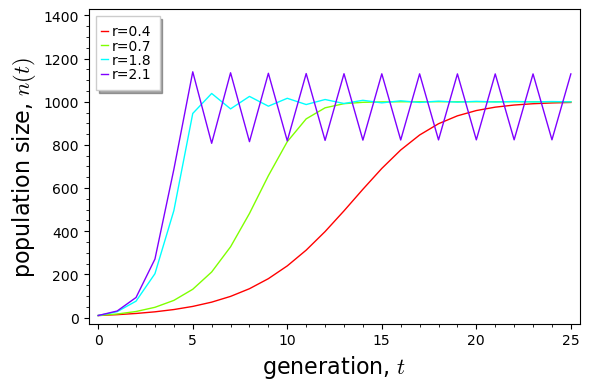

In [3]:
# plotting this for some parameter values
rs = [0.4, 0.7, 1.8, 2.1] #choose some growth rates
colors = rainbow(len(rs)) #and some fun colors

p = Graphics() #get our plot started
for i,r in enumerate(rs): #loop over the r values
    nt = n(n0=10, r=r, k=1000, max=25) #input the parameter values into our generator
    xys = [[t, n] for t,n in nt] #make a list of the [t,n(t)] pairs
    p = p + list_plot(xys, ymin=0, ymax=1400, plotjoined=True, color=colors[i], legend_label="r=%.1f" %r) #plot (note we join the dots for a clearer visual despite this being discrete time)
p.legend(True) #make a legend so we know which curve is which
p.show(frame=True, axes=False, axes_labels=["generation, $t$", "population size, $n(t)$"]) #and show the plot with some axes labels

Let's try this now for a model with **two** variables, the **Lotka-Volterra model of competition**

$n_1(t+1) = n_1(t) r_1(t) \left(1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1}\right)$

$n_2(t+1) = n_2(t) r_2(t) \left(1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2}\right)$

**Q1** Write a function that creates a generator for $n_1$ and $n_2$ and use the function to make a generator with some chosen parameter values and initial conditions

**Q2** Use the generator to make a list of [t,n1] and a list of [t,n2] and plot those two lists in one plot (try choosing different colors)

**Q3** Recreate one of the trajectories in Figure 4.14 in the text by plotting $n_2$ as a function of $n_1$

## 2. Plotting variables as functions of themselves (cobwebs)

In this week's lecture we saw an example with **diploid selection**

$p(t+1) = \frac{W_{AA} p(t)^2 + W_{Aa} p(t) q(t)}{W_{AA} p(t)^2 + W_{Aa} 2 p(t) q(t) + W_{aa} q(t)^2}$

We plotted $p(t+1)$ as a function of $p(t)$

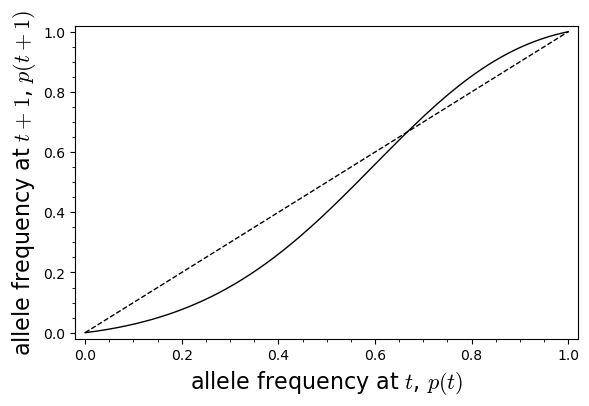

In [4]:
WAA, WAa, Waa = 0.6, 0.2, 1 #choose parameter values
var('pt') #define our variable p(t)
f = (WAA * pt**2 + WAa * pt * (1- pt) ) / (WAA * pt**2 + WAa * 2 * pt * (1 - pt) + Waa * (1 - pt)**2) #the recursion equation

#first plot a diagonal line (y = x as a function of x from 0 to 1) and set up the axes labels while we're at it
p0 = plot(x, x, 0, 1, linestyle='--', color='black', 
          axes=False, frame=True, axes_labels = ["allele frequency at $t$, $p(t)$", "allele frequency at $t+1$, $p(t+1)$"])

#now add our recursion
p = p0 + plot(f, pt, 0, 1, color='black')
p

The equilibria are where the two curves meet, which we can find with SageMath

In [5]:
eqs = solve(f == pt, pt) #find the equilibria (the values of pt that make f=p(t+1) equal pt=p(t))
eqs

[pt == 1, pt == (2/3), pt == 0]

and add to the plot

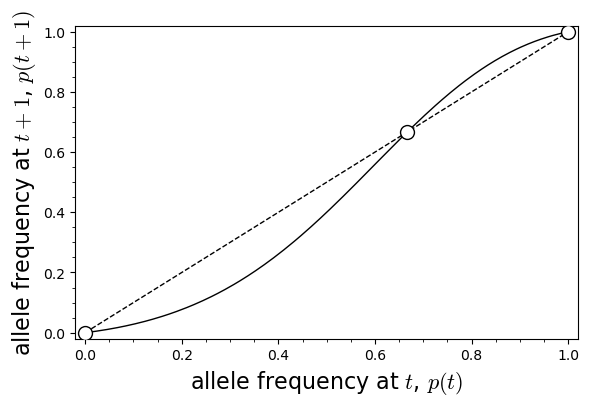

In [6]:
eqs_rhs = [i.rhs() for i in eqs] #we just want the right hand side of each of these solutions (ie, drop the "pt==" from each)
p = p + scatter_plot([[i,i] for i in eqs_rhs], markersize=100, facecolor='white')
p

We could then just trace the dynamics visually, using cob-webbing, or get a little fancier and use a generator to do it for us

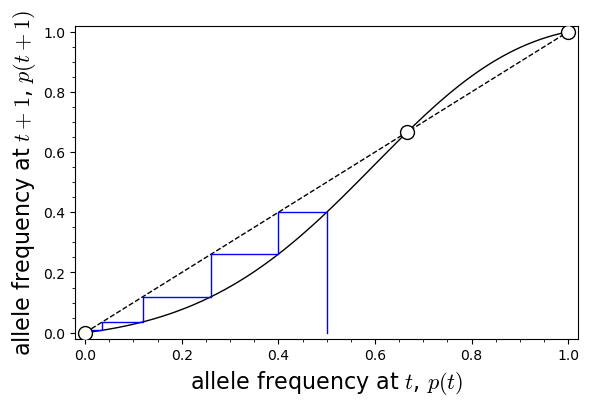

In [7]:
def pt(p0, WAA, WAa, Waa, max=Infinity):
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t <= max:
        yield pnow, pnext #current value of p(t) and p(t+1)
        pnext = (WAA * pnow**2 + WAa * pnow * (1 - pnow)) / (WAA * pnow**2 + WAa * 2 * pnow * (1 - pnow) + Waa * (1 - pnow)**2) #update p(t+1)
        yield pnow, pnext #current value of p(t) and p(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t

pts = pt(p0=0.5, WAA=WAA, WAa=WAa, Waa=Waa, max=5)
ps = [[x,y] for x,y in pts]
p = p + list_plot(ps, plotjoined=True)
p

We see that $p=0$ is a stable equilibrium so we could fill that point in

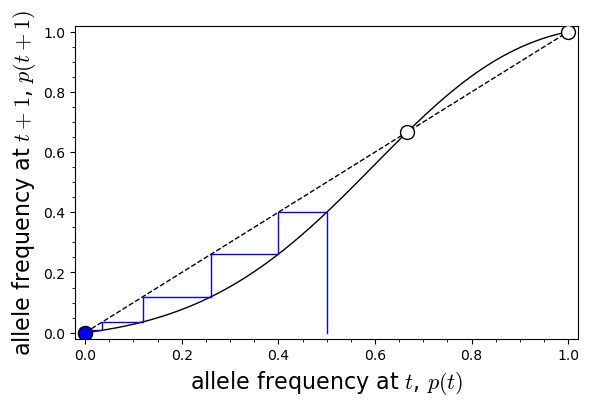

In [8]:
p = p + scatter_plot([[eqs_rhs[2],eqs_rhs[2]]], markersize=100, facecolor='blue')
p

Now let's move on to the model of **logistic growth**

$n(t+1) = n(t) + r n(t) (1 - n(t) / K)$

**Q4** Plot $n(t+1)$ as a function of $n(t)$ for $r=1$ and $K=1000$, and include a diagonal line for reference

**Q5** Now make a generator for cob-webbing and add that to the plot for initial condition $n(0)=800$

**Q6** Now make the same plot for $r=2$ and for $r=2.7$

What is the key difference in how the two lines intersect at (K,K) for $r=1$ vs $r>2$? See Section 4.3.2 and Box 4.2 in the text for more info.

## 3. Phase planes, vector fields, and null clines

The previous technique is "easier" than simulating (the first technique) because all we have to do to understand the dynamics is plot the recursion itself rather than iterating it over time (although we did iterate to make the actual cob-web, we don't need to do that to understand the dynamics once we remember that we go to the left when the recursion is below the 1:1 line and to the right when the recursion is above the 1:1 line). 

However, cob-webbing is limited to models with a single variable (eg, allele frequency or population size).

For models of **two** variables we can make a third type of visual aid, a **phase plane**.

In the lectures we saw an example of this for the **Lotka-Volterra model of competition**

We first plot the change in our variables ($\Delta n_1$, $\Delta n_2$) from many different starting points ($n_1$, $n_2$) as vectors. This is called a **vector field**

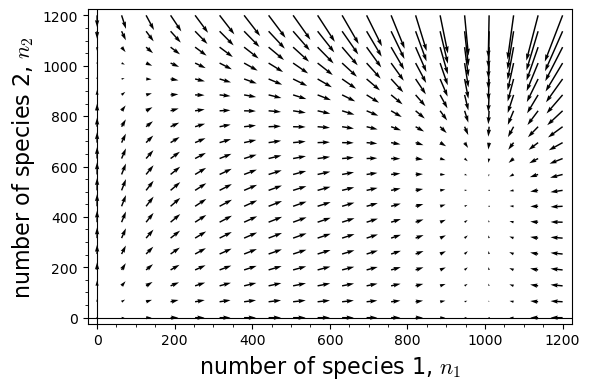

In [9]:
n1, n2 = var('n1, n2') #our variables

#choose parameter values
r1, r2 = 0.5, 0.5
k1, k2 = 1000, 1000
a12, a21 = 0, 0.5

#our difference equations
dn1(n1, n2) = r1 * n1 * (1 - (n1 + a12 * n2) / k1)
dn2(n1, n2) = r2 * n2 * (1 - (n2 + a21 * n1) / k2)

# plot the vector field
p = plot_vector_field((dn1, dn2), (n1,0,1200), (n2,0,1200), axes_labels=["number of species 1, $n_1$", "number of species 2, $n_2$"])

p

This shows how the variables will change through time, by following the arrows. 

We then added the **null clines**, which show where either $n_1$ or $n_2$ is constant (ie, where $\Delta n_1=0$ or $\Delta n_2=0$) 

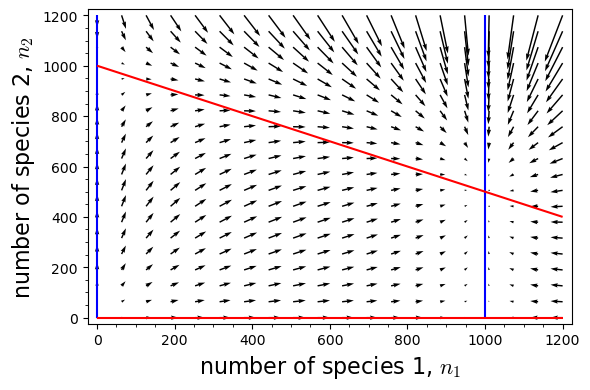

In [11]:
#plot the null clines for species 1 (blue)
p += implicit_plot(dn1(n1,n2)==0, (n1,0,1200), (n2,0,1200), aspect_ratio='automatic')
# note: an "implicit_plot" plots where an equation is true (here the values of (n1,n2) that satisfy dn1=0 or dn2=0), without us first having to solve that equation

#plot the null clines for species 2 (red)
p += implicit_plot(dn2(n1,n2)==0, (n1,0,1200), (n2,0,1200), color="red", aspect_ratio='automatic')
p

The equilibria are the places where these curves meet (ie, where both $n_1$ and $n_2$ are constant, $\Delta n_1=0$ and $\Delta n_2=0$)

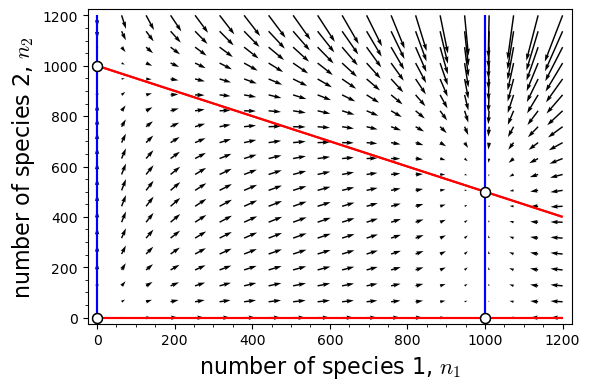

In [59]:
#find and plot the equilibria
eqs = solve([dn1(n1,n2)==0, dn2(n1,n2)==0], (n1, n2)) #solve for the equilibria
p += scatter_plot([[i.subs(eq) for i in [n1,n2]] for eq in eqs], facecolor='white')

p

The null clines are where the change in a variable is zero, which means they also show where the change in a variable switches between positive and negative. This means that in a region delimited by null clines the dynamics always point in the qualitatively same direction (eg, here all the vectors in the bottom left region point up and to the right). We now have a pretty good sense of the models dynamics knowing just a single vector in each region.

**Q7** Use the generator for n1 and n2 you created above to overlay one trajectory on this phase plane

Alright, now let's do this for a model we haven't seen yet, of a predator and prey (or "consumer" and "resource" to be more general; see Section 3.4.2 of the text for more info). This time we'll work in continuous-time, but the workflow is exactly the same, now we just use the differential equations, rather than the difference equations, to make the vector field.

The model we'll look at is called the **Lotka-Volterra predator-prey model**. We assume the number of prey, $n_1$ increases exponentially at rate $r$ in the absence of predators. We assume that predators and prey meet each other at rate $c n_1 n_2$, where $n_2$ is the number of predators and $c$ is a contact rate. We'll then assume that, on contact, a predator consumes prey with probability $a$ and that a fraction $\epsilon$ of consumed prey are converted into new predators. Finally, we assume that predators die at a constant rate, $\delta$. We then have

$\mathrm{d}n_1/\mathrm{d}t = r n_1(t) - a c n_1(t) n_2(t)$

$\mathrm{d}n_2/\mathrm{d}t = \epsilon a c n_1(t) n_2(t) - \delta n_2(t)$

**Q8** Plot a phase-plane with vector field for this model with $r=0.5$, $a = 1$, $c=0.01$, $\epsilon=0.02$, $\delta=0.1$

**Q9** Add null clines and the equilibria to this plot

**Q10** Numerically solve the system of differential equations for initial conditions $n_1(0)=400$ and $n_2(0)=30$ (remember ```desolve_odeint```?) and add this trajectory to the phase plane

What type of dynamics do you see?